Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/philosopher/1/'

N = 1_000
M = 100_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 11 08:29:27 2025 +0200) (510.77ms ela...,0.203,0.0000,0.353,0.51,0.04,2.96,53.93 C,Nominal
1,(Fri Apr 11 08:29:27 2025 +0200) (509.18ms ela...,0.207,0.0336,0.378,0.35,0.10,7.26,53.93 C,Nominal
2,(Fri Apr 11 08:29:28 2025 +0200) (506.63ms ela...,1.050,0.0000,0.282,1.18,0.15,12.57,54.08 C,Nominal
3,(Fri Apr 11 08:29:28 2025 +0200) (508.77ms ela...,0.125,0.0000,0.273,0.19,0.07,4.76,54.08 C,Nominal
4,(Fri Apr 11 08:29:29 2025 +0200) (507.59ms ela...,0.675,0.0000,0.298,0.79,0.17,13.28,53.75 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(1004, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 11 08:29:39 2025 +0200) (1009.33ms el...,35.7,0.00000,0.873,36.47,3.97,99.42,51.92 C,Nominal
1,(Fri Apr 11 08:29:40 2025 +0200) (1006.38ms el...,35.0,0.00000,0.455,35.62,3.95,99.18,55.96 C,Nominal
2,(Fri Apr 11 08:29:41 2025 +0200) (1004.45ms el...,36.1,0.01170,0.794,37.03,3.96,99.29,59.18 C,Nominal
3,(Fri Apr 11 08:29:42 2025 +0200) (1005.76ms el...,34.3,0.00127,0.457,34.92,3.98,99.66,61.63 C,Nominal
4,(Fri Apr 11 08:29:43 2025 +0200) (1005.59ms el...,33.0,0.00000,0.424,33.68,3.97,99.59,63.40 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 11 08:55:40 2025 +0200) (510.51ms ela...,0.1930,0.0000,0.260,0.31,0.05,3.97,39.12 C,Nominal
1,(Fri Apr 11 08:55:41 2025 +0200) (508.33ms ela...,0.1000,0.0375,0.381,0.27,0.06,3.80,39.12 C,Nominal
2,(Fri Apr 11 08:55:41 2025 +0200) (507.72ms ela...,4.9200,0.0000,0.413,5.37,0.94,81.34,39.12 C,Nominal
3,(Fri Apr 11 08:55:42 2025 +0200) (506.70ms ela...,3.5800,0.0000,0.488,4.05,0.76,72.44,39.06 C,Nominal
4,(Fri Apr 11 08:55:42 2025 +0200) (509.58ms ela...,0.0481,0.0000,0.259,0.12,0.03,2.23,39.06 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(3622, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 11 08:55:52 2025 +0200) (1007.77ms el...,28.4,0.000000,0.702,29.10,3.88,98.48,41.82 C,Nominal
1,(Fri Apr 11 08:55:53 2025 +0200) (1004.86ms el...,27.0,0.000000,0.665,27.72,3.74,97.70,44.70 C,Nominal
2,(Fri Apr 11 08:55:54 2025 +0200) (1004.85ms el...,27.0,0.000000,0.450,27.55,3.83,97.74,47.12 C,Nominal
3,(Fri Apr 11 08:55:55 2025 +0200) (1004.75ms el...,27.1,0.000000,0.445,27.61,3.84,98.05,49.21 C,Nominal
4,(Fri Apr 11 08:55:56 2025 +0200) (1005.57ms el...,26.9,0.000303,0.481,27.51,3.78,97.28,50.57 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-11 08:29:27,0.203,0.0000,0.353,0.51,0.04,2.96,53.93,Nominal,510.77
1,2025-04-11 08:29:27,0.207,0.0336,0.378,0.35,0.10,7.26,53.93,Nominal,509.18
2,2025-04-11 08:29:28,1.050,0.0000,0.282,1.18,0.15,12.57,54.08,Nominal,506.63
3,2025-04-11 08:29:28,0.125,0.0000,0.273,0.19,0.07,4.76,54.08,Nominal,508.77
4,2025-04-11 08:29:29,0.675,0.0000,0.298,0.79,0.17,13.28,53.75,Nominal,507.59


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(1004, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-11 08:29:39,35.7,0.00000,0.873,36.47,3.97,99.42,51.92,Nominal,1009.33
1,2025-04-11 08:29:40,35.0,0.00000,0.455,35.62,3.95,99.18,55.96,Nominal,1006.38
2,2025-04-11 08:29:41,36.1,0.01170,0.794,37.03,3.96,99.29,59.18,Nominal,1004.45
3,2025-04-11 08:29:42,34.3,0.00127,0.457,34.92,3.98,99.66,61.63,Nominal,1005.76
4,2025-04-11 08:29:43,33.0,0.00000,0.424,33.68,3.97,99.59,63.40,Nominal,1005.59


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-11 08:55:40,0.1930,0.0000,0.260,0.31,0.05,3.97,39.12,Nominal,510.51
1,2025-04-11 08:55:41,0.1000,0.0375,0.381,0.27,0.06,3.80,39.12,Nominal,508.33
2,2025-04-11 08:55:41,4.9200,0.0000,0.413,5.37,0.94,81.34,39.12,Nominal,507.72
3,2025-04-11 08:55:42,3.5800,0.0000,0.488,4.05,0.76,72.44,39.06,Nominal,506.70
4,2025-04-11 08:55:42,0.0481,0.0000,0.259,0.12,0.03,2.23,39.06,Nominal,509.58


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(3622, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-11 08:55:52,28.4,0.000000,0.702,29.10,3.88,98.48,41.82,Nominal,1007.77
1,2025-04-11 08:55:53,27.0,0.000000,0.665,27.72,3.74,97.70,44.70,Nominal,1004.86
2,2025-04-11 08:55:54,27.0,0.000000,0.450,27.55,3.83,97.74,47.12,Nominal,1004.85
3,2025-04-11 08:55:55,27.1,0.000000,0.445,27.61,3.84,98.05,49.21,Nominal,1004.75
4,2025-04-11 08:55:56,26.9,0.000303,0.481,27.51,3.78,97.28,50.57,Nominal,1005.57


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


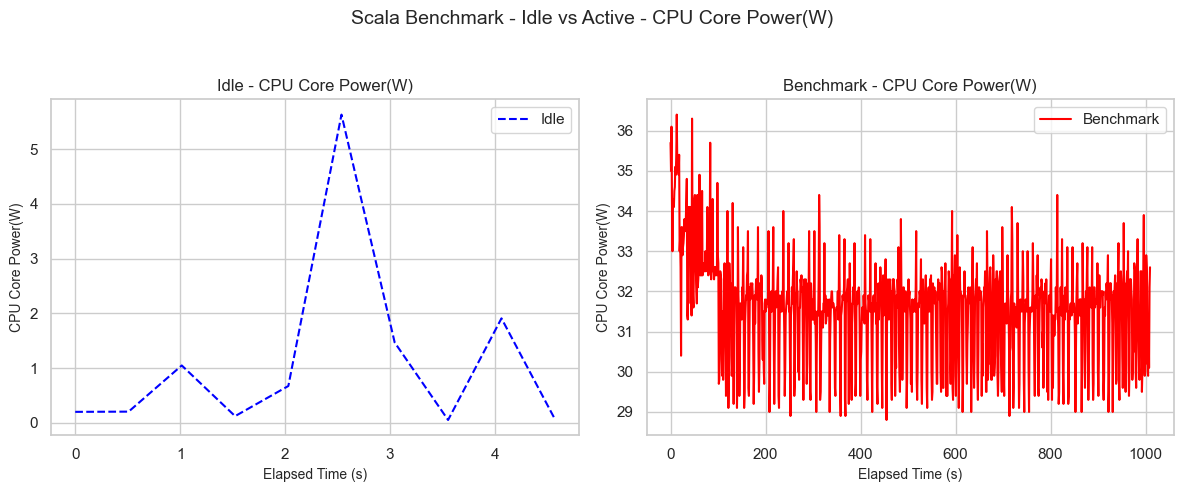

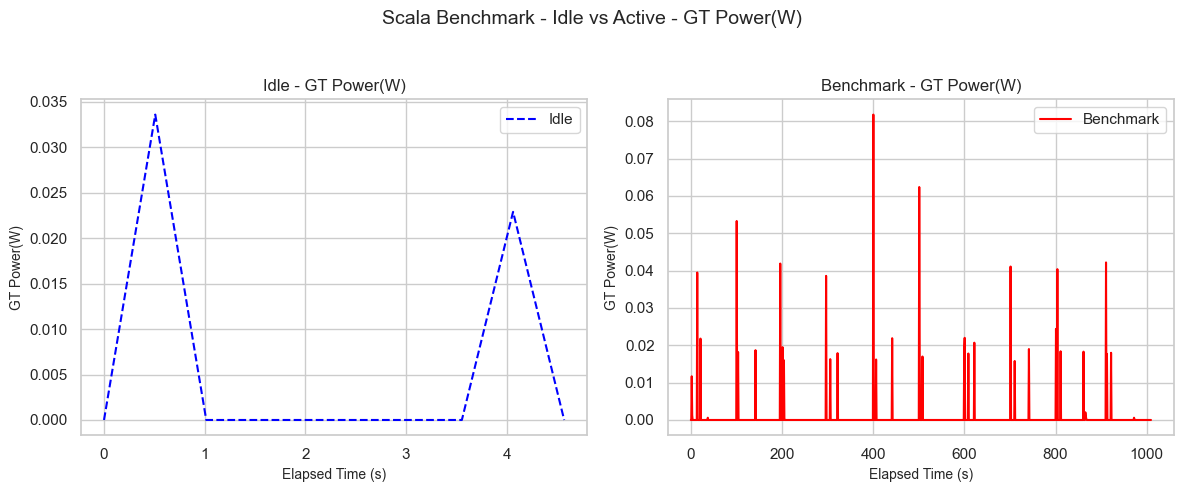

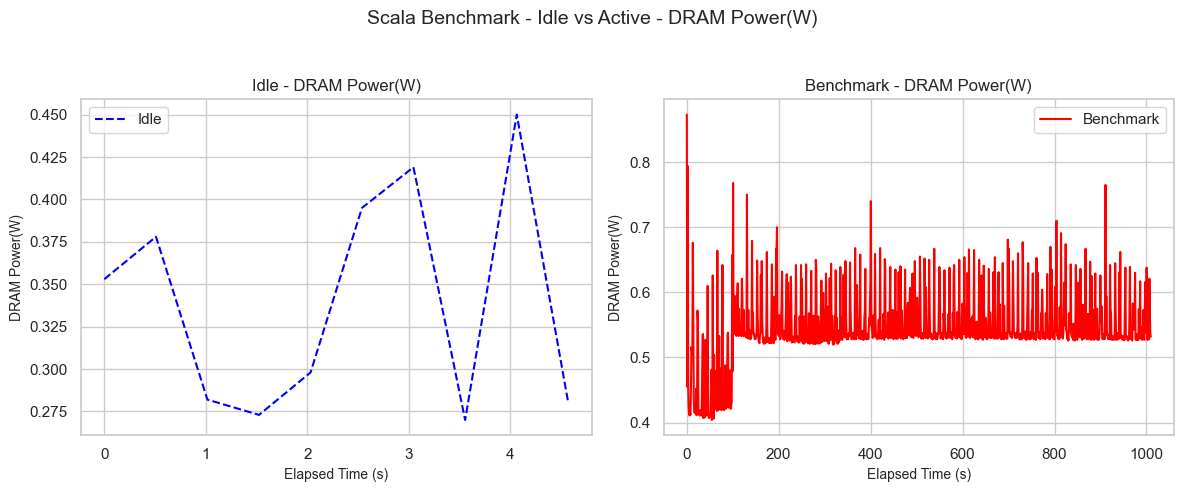

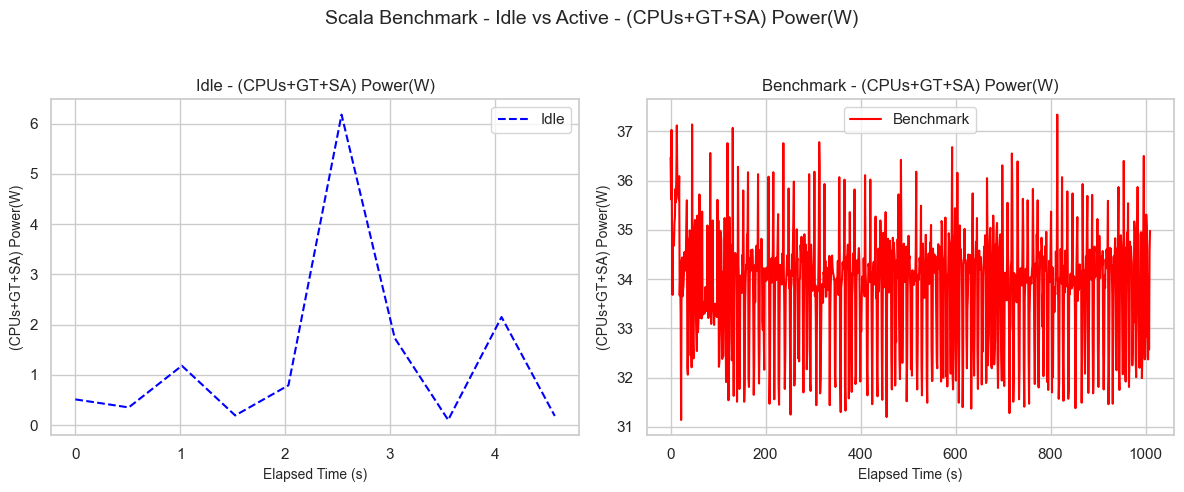

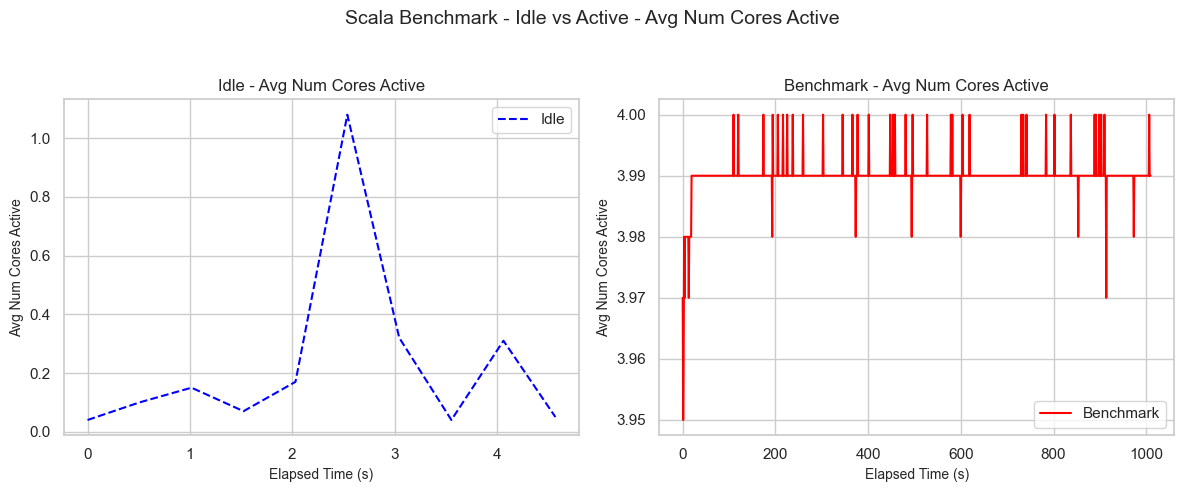

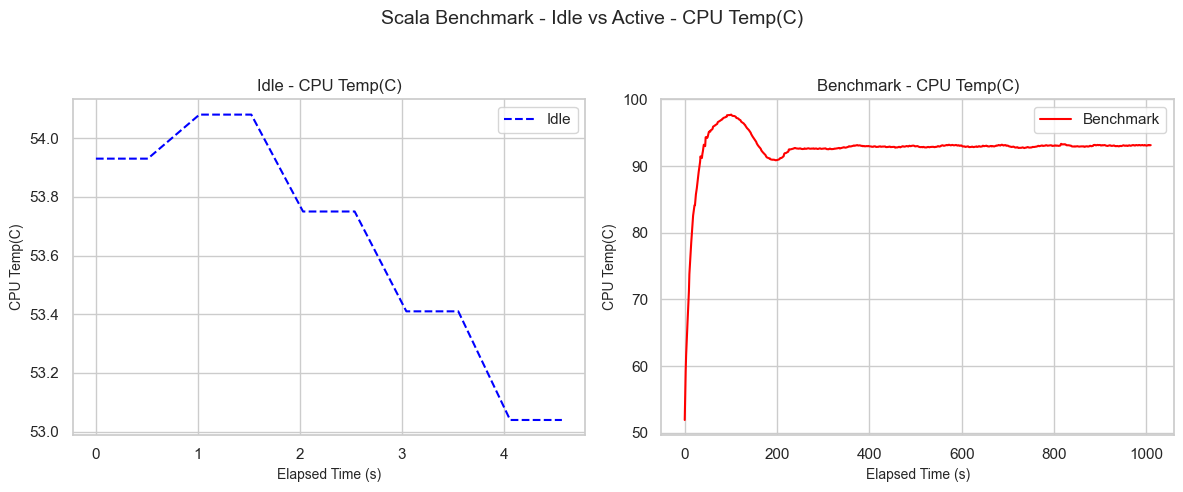

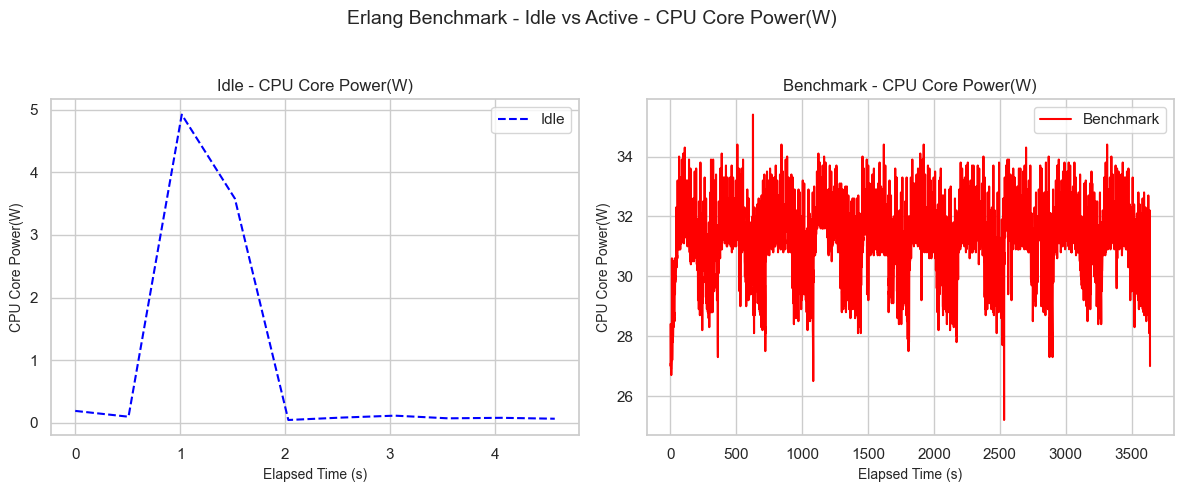

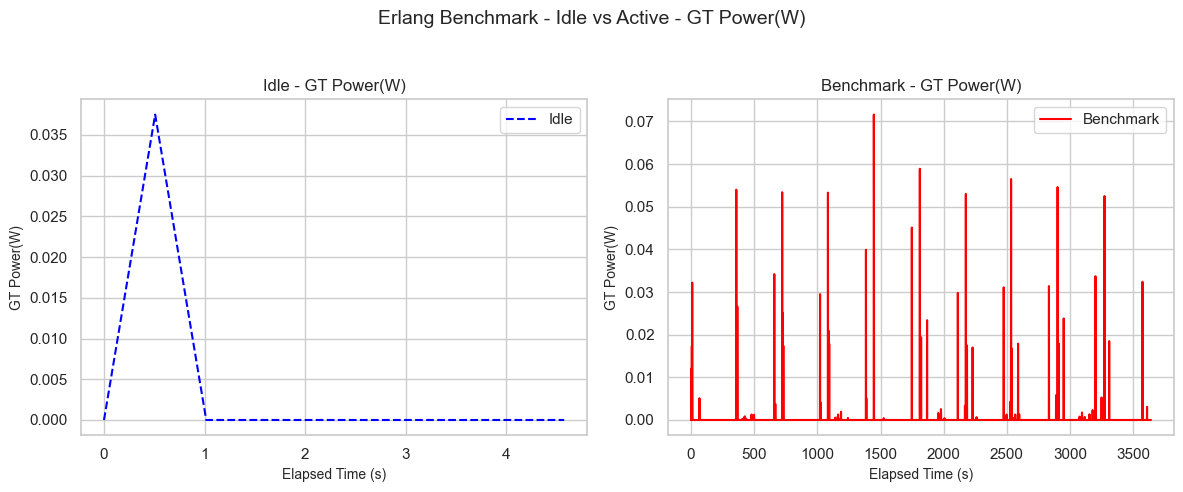

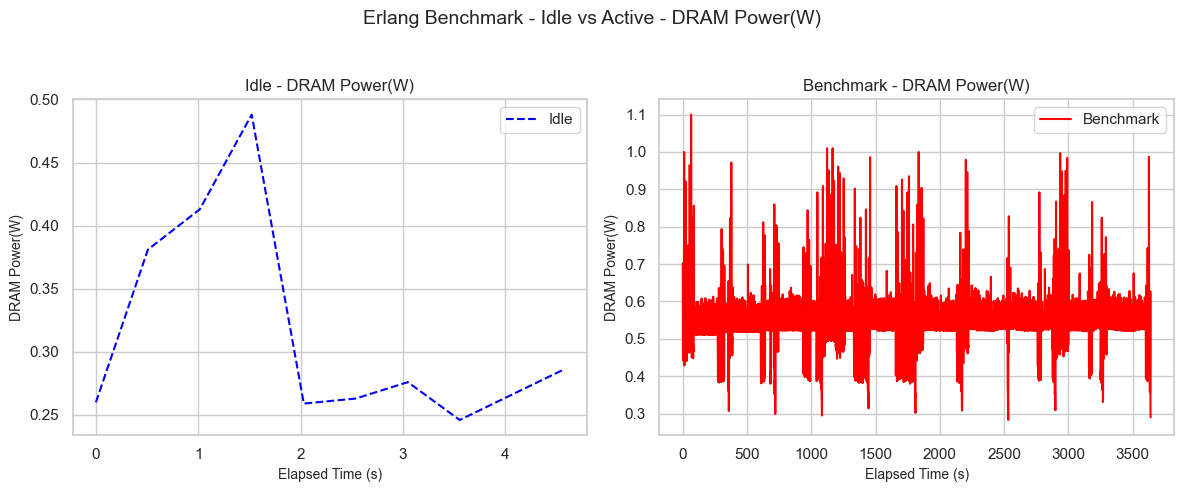

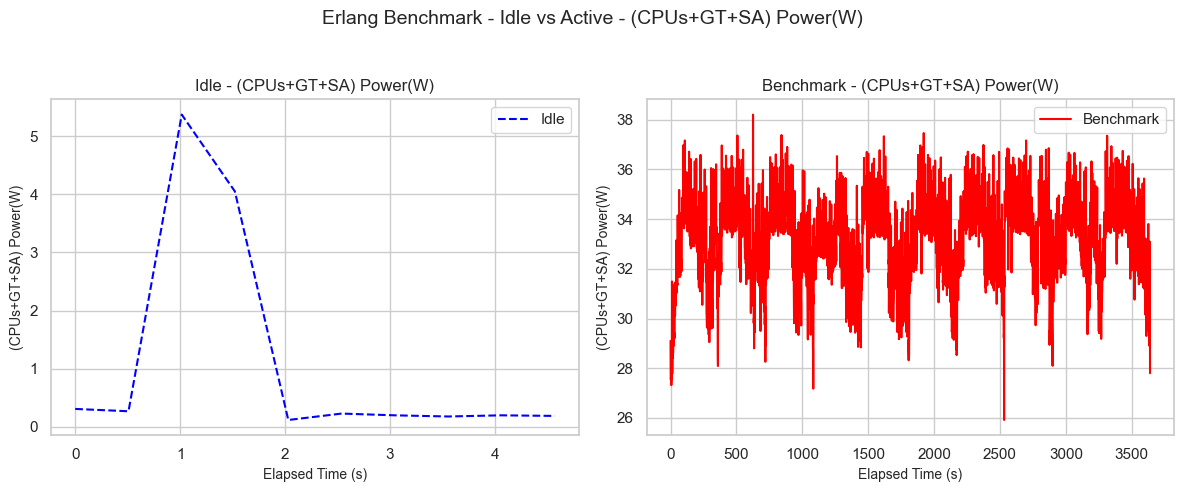

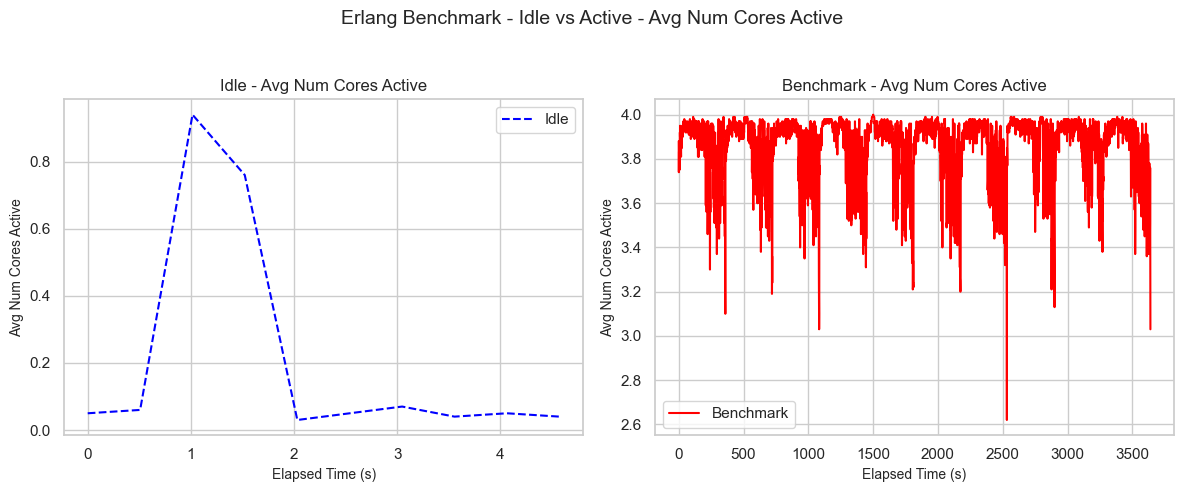

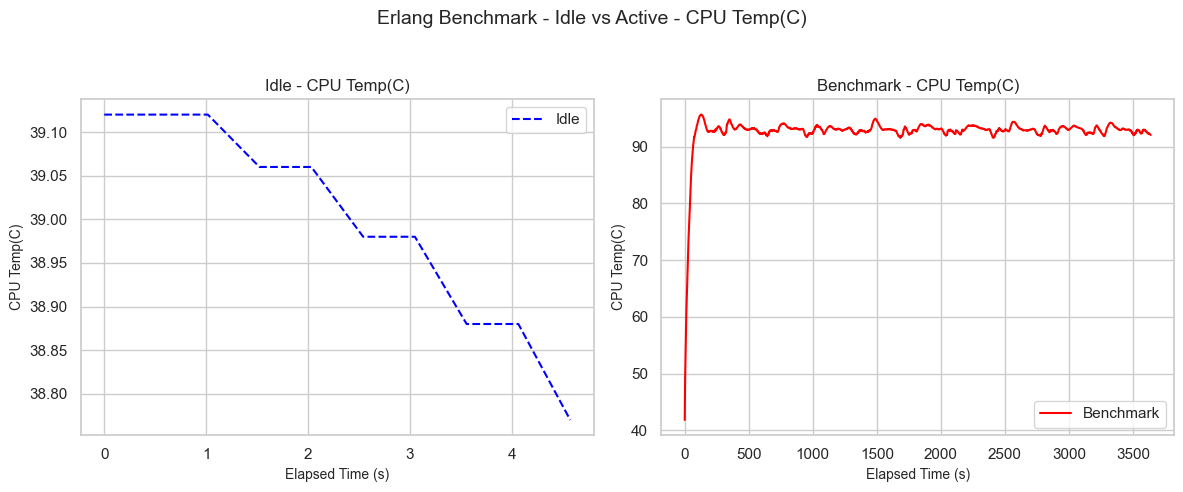

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

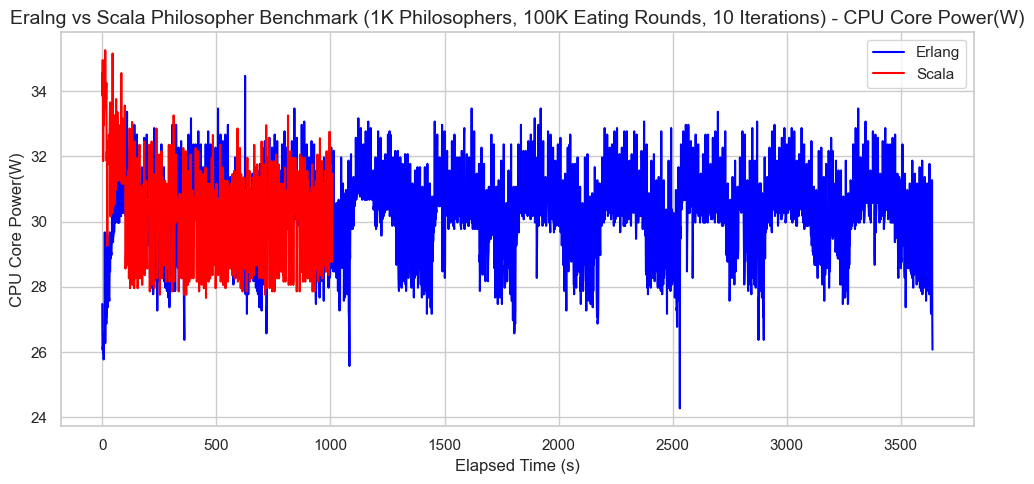

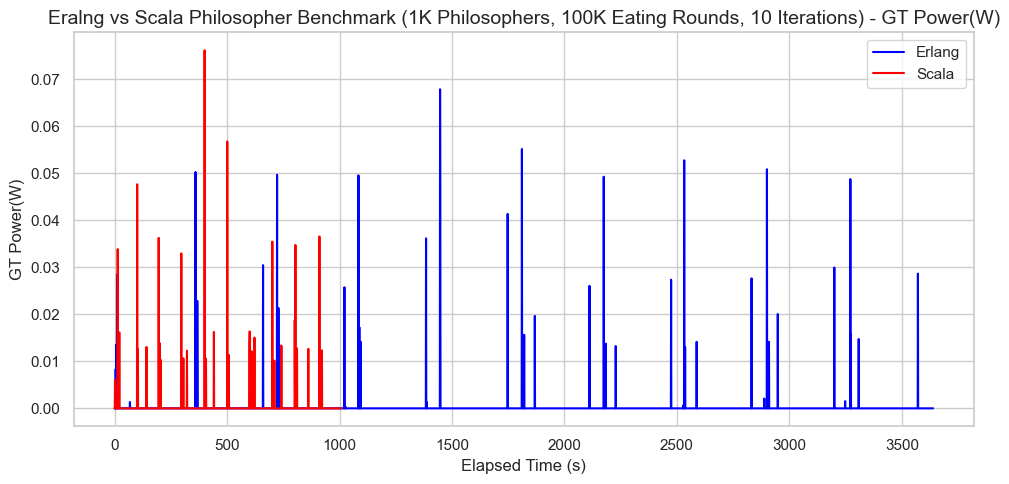

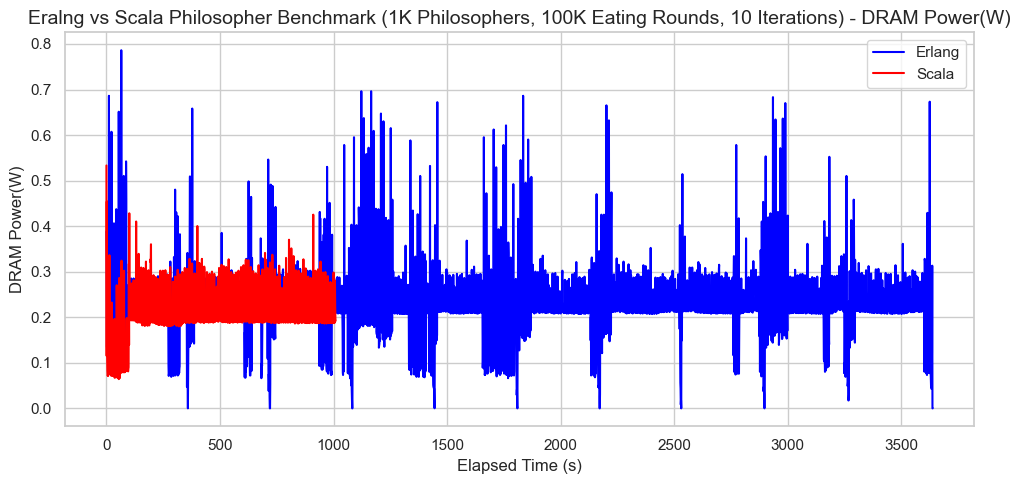

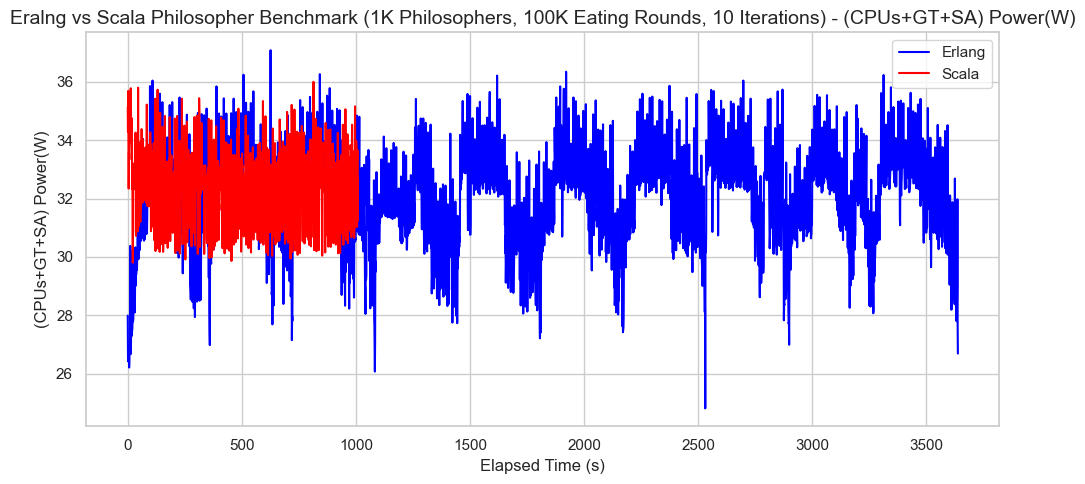

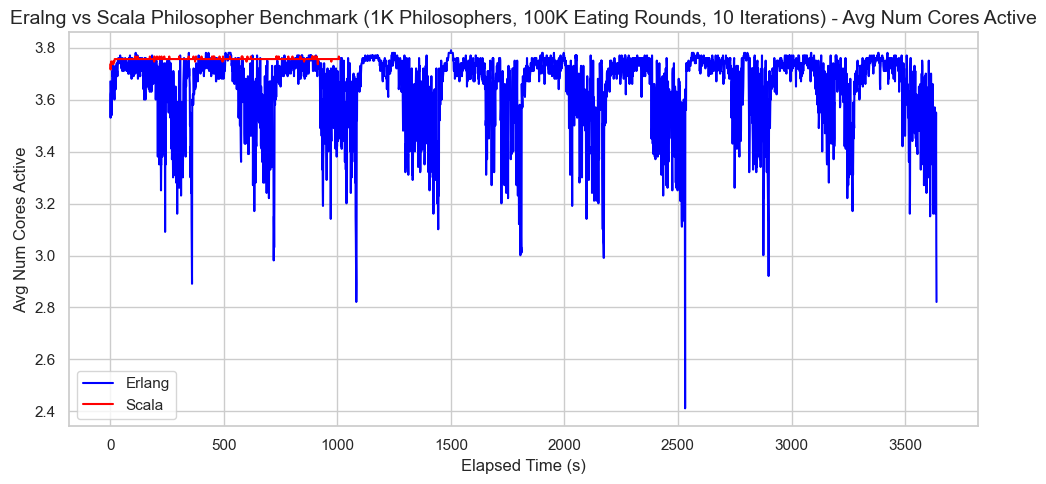

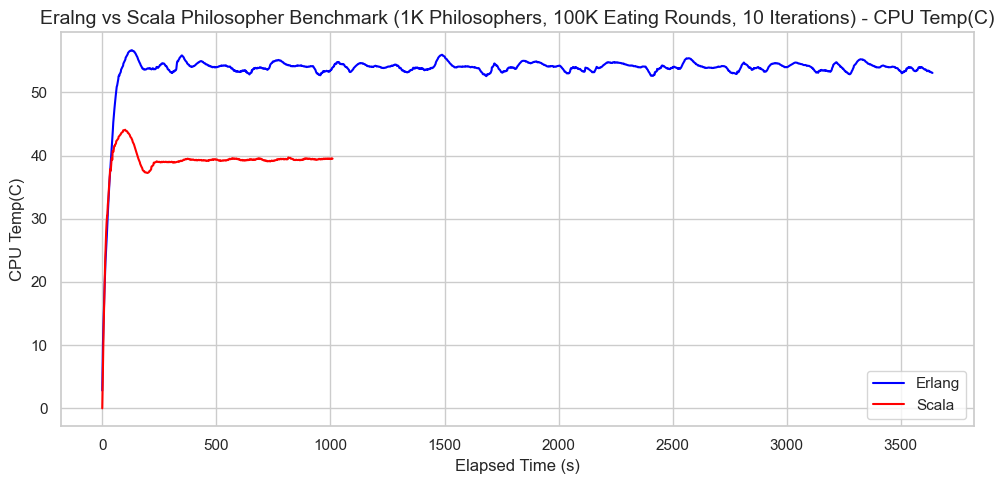

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.411414
GT Power(W)              -0.004771
DRAM Power(W)             0.204287
(CPUs+GT+SA) Power(W)    32.511729
CPU Temp(C)              39.035769
Avg Num Cores Active      3.757010
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        29.967829
GT Power(W)              -0.003381
DRAM Power(W)             0.213159
(CPUs+GT+SA) Power(W)    31.799121
CPU Temp(C)              53.680938
Avg Num Cores Active      3.646320
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time
scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/philosopher/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 30933.84862939101 Joules
Erlang Benchmark: 109850.08407733099 Joules
